In [5]:
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [10]:

ds_folder = "cifar"
ds_name = "cifar"

root = f"/mnt/xfs/projects/trak_transfer/cfs/{ds_folder}/results" #cf_results
class_mode = False
bottom_name = f"in_{ds_name}_bottom" # in_cifar_bottom
top_name = f"in_{ds_name}_top" # in_cifar_top
random_name = f"random"

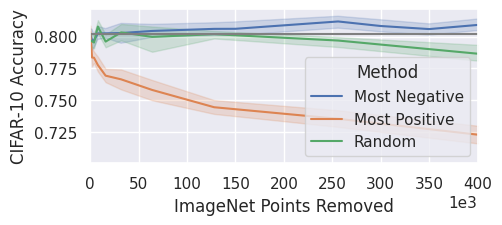

In [11]:
df = []
for method_name, name in [("Most Negative", bottom_name), ("Most Positive", top_name), ("Random", random_name)]:
    if not os.path.exists(os.path.join(root, name)):
        continue
    for run_name in os.listdir(os.path.join(root, name)):
        result_path = os.path.join(root, name, run_name, "results.pt")
        
        if not os.path.exists(result_path):
            continue
        out = torch.load(result_path)
        if ds_name == 'chestxray':
            r = out['finetune']['val']
            corr = r['preds'] == r['labels']
            acc = (
                corr[r['labels'] == 0].mean() + corr[r['labels'] == 1].mean()
            )/2
        else:
            acc = out['finetune']['val']['acc']
        K = int(run_name.split('_')[0])
        # print(method_name, K, out['finetune']['val']['preds'].sum())

        df.append([method_name, K, acc])
        # if K == 0:
        #     for K_2 in base_range:
        #         df.append(['base', K_2, acc])



df = pd.DataFrame(df, columns=["Method", "K", "acc"])

df['K'] = df['K'].astype(int)

sns.set()
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.lineplot(data=df, x="K", y="acc", hue="Method", ax=ax)
base_acc = df[df['K'] == 0]['acc'].mean()
ax.axhline(base_acc, color='gray')
if class_mode:
    plt.xlabel("ImageNet Classes Removed")
else:
    ax.set_xlim(0, 400_000)
    plt.ticklabel_format(axis='x', style='scientific', scilimits=(3,3))
    plt.xlabel("ImageNet Points Removed")
plt.ylabel("CIFAR-10 Accuracy")
plt.savefig("examplewise_cf.pdf", bbox_inches='tight')
plt.show()


In [21]:
r = out['finetune']['val']

In [17]:
corr = r['preds'] == r['labels']

In [18]:
r['preds'].sum()

0

In [24]:
r['preds'].sum()

1